In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plot

In [2]:
l_ecoli_rec = ["Data"]
l_ecoli_attr = ["SeqN","mcg","gvh","lip","chg","aac","alm2","alm1","class"]
l_ecoli_feat = ["SeqN","mcg","gvh","lip","chg","aac","alm2","alm1"]
l_ecoli_class = ["class"]

In [3]:
def read_file():
    df_ecoli = pd.read_csv(r"C:\Users\Levi\Documents\Computer Science\_School\Data Mining\HW2\ecoli.csv", header=None,names=l_ecoli_rec)
    df_attr = pd.DataFrame()
    df_attr = df_ecoli.Data.str.split(expand=True)
    df_attr.columns = l_ecoli_attr
    
    print("All the Attributes")
    print("Attributes for classification")
    print(df_attr.head())
    print("Attributes for classification")
    print((df_attr.iloc[:,1:7]).head())
    return df_attr

All the Attributes
Attributes for classification
         SeqN   mcg   gvh   lip   chg   aac  alm2  alm1 class
0   AAT_ECOLI  0.49  0.29  0.48  0.50  0.56  0.24  0.35    cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.50  0.54  0.35  0.44    cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.50  0.49  0.37  0.46    cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.50  0.52  0.45  0.36    cp
4   ADI_ECOLI  0.23  0.32  0.48  0.50  0.55  0.25  0.35    cp
Attributes for classification
    mcg   gvh   lip   chg   aac  alm2
0  0.49  0.29  0.48  0.50  0.56  0.24
1  0.07  0.40  0.48  0.50  0.54  0.35
2  0.56  0.40  0.48  0.50  0.49  0.37
3  0.59  0.49  0.48  0.50  0.52  0.45
4  0.23  0.32  0.48  0.50  0.55  0.25
Confusion Matrix
[[29  1  0  0  2]
 [ 0 12  2  0  0]
 [ 0  1  5  0  0]
 [ 0  0  0  2  0]
 [ 1  1  0  2 10]]
Confusion Matrix
[[31  0  0  0  0  1]
 [ 0  8  2  2  0  2]
 [ 0  0  0  0  0  0]
 [ 0  1  0  4  0  1]
 [ 0  0  0  0  0  2]
 [ 1  0  0  0  0 13]]
Confusion Matrix
[[31  0  0  0  1]
 [ 0 10  4  0  0]
 [ 0  2  4  0  0

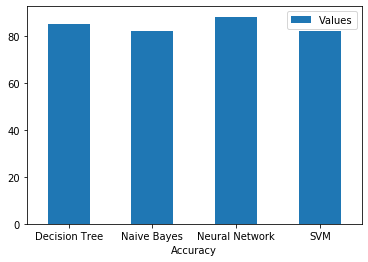

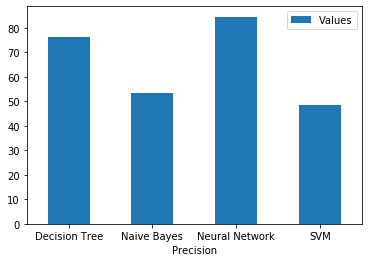

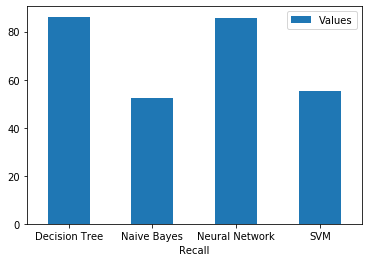

In [4]:
def main():
    df_input = read_file()
    df_feat_train, df_feat_test, df_class_train, df_class_test = train_test_split(df_input.iloc[:,1:8],df_input.iloc[:,8], test_size=0.2, random_state=1)
    
    #decision Tree
    cls_algDT = DecisionTreeClassifier()
    cls_treeDT = cls_algDT.fit(df_feat_train, df_class_train)
    cls_algDT = cls_algDT.fit(df_feat_train, df_class_train)
    df_class_predDT = cls_treeDT.predict(df_feat_test)
    
    confusion_matrix = metrics.confusion_matrix(df_class_test, df_class_predDT)
    print("Confusion Matrix")
    print(confusion_matrix)

    
    #naive bayes
    cls_algGNB = GaussianNB()
    cls_modelGNB = cls_algGNB.fit(df_feat_train, df_class_train)
    df_class_predGNB = cls_modelGNB.predict(df_feat_test)
    
    confusion_matrix = metrics.confusion_matrix(df_class_test, df_class_predGNB)
    print("Confusion Matrix")
    print(confusion_matrix)

    #neural network
    cls_algNN = mlp(solver='lbfgs', random_state = 1, activation='relu')
    cls_modelNN = cls_algNN.fit(df_feat_train, df_class_train)
    df_class_predNN = cls_modelNN.predict(df_feat_test)

    confusion_matrix = metrics.confusion_matrix(df_class_test, df_class_predNN)
    print("Confusion Matrix")
    print(confusion_matrix)    
    
    #SVM
    cls_algSVM = svm.SVC(gamma='auto')
    cls_modelSVM = cls_algSVM.fit(df_feat_train, df_class_train)
    df_class_predSVM = cls_algSVM.predict(df_feat_test)
    
    confusion_matrix = metrics.confusion_matrix(df_class_test, df_class_predSVM)
    print("Confusion Matrix")
    print(confusion_matrix)   
    
    #Accuracy
    print("")
    acc_DT = metrics.accuracy_score(df_class_test, df_class_predDT)
    print("Accuracy for Decision Tree")
    print(acc_DT)
    print("")
    acc_GNB = metrics.accuracy_score(df_class_test, df_class_predGNB)
    print("Accuracy for Naive Bayes")
    print(acc_GNB)
    print("")
    acc_NN = metrics.accuracy_score(df_class_test, df_class_predNN)
    print("Accuracy for Neural Network")
    print(acc_NN)
    print("")
    acc_SVM = metrics.accuracy_score(df_class_test, df_class_predSVM)
    print("Accuracy for SVM")
    print(acc_SVM)
    print("")

    #Precision
    prec_DT = metrics.precision_score(df_class_test, df_class_predDT, average='macro')
    print("Precision for Decision Tree")
    print(prec_DT)
    print("")
    prec_GNB = metrics.precision_score(df_class_test, df_class_predGNB, average='macro')
    print("Precision for Naive Bayes")
    print(prec_GNB)
    print("")
    prec_NN = metrics.precision_score(df_class_test, df_class_predNN, average='macro')
    print("Precision for Neural Network")
    print(prec_NN)
    print("")
    prec_SVM = metrics.precision_score(df_class_test, df_class_predSVM, average='macro')
    print("Precision for SVM")
    print(prec_SVM)
    print("")
    
    #Recall
    rec_DT = metrics.recall_score(df_class_test, df_class_predDT, average='macro')
    print("Recall for Decision Tree")
    print(rec_DT)
    print("")
    rec_GNB = metrics.recall_score(df_class_test, df_class_predGNB, average='macro')
    print("Recall for Naive Bayes")
    print(rec_GNB)
    print("")
    rec_NN = metrics.recall_score(df_class_test, df_class_predNN, average='macro')
    print("Recall for Neural Network")
    print(rec_NN)
    print("")
    rec_SVM = metrics.recall_score(df_class_test, df_class_predSVM, average='macro')
    print("Recall for SVM")
    print(rec_SVM)
    print("")
    
    #Bar Graphs for Accuracy, Precision, Recall
    print("Bar Graph for Accuracy, Precision, Recall:")
    bgAccuracy = pd.DataFrame({'Accuracy':['Decision Tree', 'Naive Bayes', 'Neural Network', 'SVM'], 'Values':[(acc_DT*100), (acc_GNB*100), (acc_NN*100), (acc_SVM*100)]})
    createAccuracyBG = bgAccuracy.plot.bar(x='Accuracy', y='Values', rot=0)
    bgAccuracy = pd.DataFrame({'Precision':['Decision Tree', 'Naive Bayes', 'Neural Network', 'SVM'], 'Values':[(prec_DT*100), (prec_GNB*100), (prec_NN*100), (prec_SVM*100)]})
    createPrecisionBG = bgAccuracy.plot.bar(x='Precision', y='Values', rot=0)
    bgAccuracy = pd.DataFrame({'Recall':['Decision Tree', 'Naive Bayes', 'Neural Network', 'SVM'], 'Values':[(rec_DT*100), (rec_GNB*100), (rec_NN*100), (rec_SVM*100)]})
    createRecallBG = bgAccuracy.plot.bar(x='Recall', y='Values', rot=0)
    return
main()